
#  Global Happiness Index: 
##  Uncovering Disparities and Determinants Across Nations


1. [Intrudaction:](#section1)
2. [Remove missing values:](#section2)
3. [Research question one:](#section3)
4. [Research question two:](#section4)
5. [Research question three:](#section5)

![Happiness Image](http://localhost:8888/files/units/7cca5a93-a034-485f-99db-049a76c88c68.png?_xsrf=2%7Cfce23e3b%7C8f29160dfa45433417281b92a9a957b6%7C1689958597)


<a id='section1'></a>
## Introduction

Welcome to my project on Global Happiness! In this study, we explore happiness scores across various nations, focusing on six key categories:

- Social support
- Log GDP per capita
- Healthy life expectancy
- Freedom to make life choices
- Perceptions of corruption
- Generosity

Through data visualization and statistical analysis, we aim to identify insights into the determinants of happiness and unveil disparities between countries.

In [919]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import plotly.graph_objects as go

Reading the data from excel:

In [348]:
url = "happines.csv"
link_data = pd.read_csv(url)
link_data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


<a id='section2'></a>
## Remove missing values:

In [944]:
df_cleaned = link_data.dropna()
df_cleaned
df_cleaned.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [350]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

### Shows the distribution of the data:

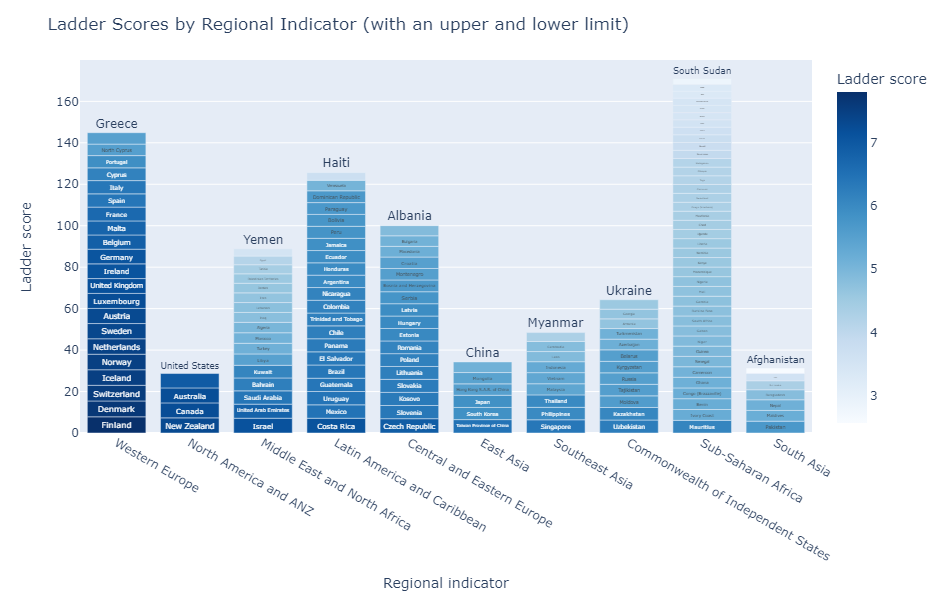

In [925]:
df_sorted = df_cleaned.sort_values(by="Ladder score", ascending=False)
fig = px.bar(
    df_sorted,
    x='Regional indicator',
    y='Ladder score',
    text='Country name',  
    color='Ladder score',  
    color_continuous_scale='Blues',  
    hover_data={'Regional indicator': False},  
)
fig.update_traces(hovertemplate='Country: %{text}<br>Ladder score: %{y:.2f}<br>Regional indicator: %{x}')
fig.update_layout(
    title='Ladder Scores by Regional Indicator (with an upper and lower limit)',
    xaxis_title='Regional indicator',
    yaxis_title='Ladder score',
    showlegend=False,  
    width=1000,  
    height=600,  
)
fig.show()


<a id='section3'></a>
### Research Question 1:  
This question's research aims to identify the happiest countries worldwide and determine the most peaceful regions (continents) globally.


In [714]:
Finland = df_cleaned.groupby(["Country name","Ladder score"]).mean().sort_values(by="Ladder score", ascending=False).head(1)
Finland

,,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,Ladder score,,,,,,,,,,,,,,,,,
Finland,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,-0.059482,0.195445,1.972317,1.28519,1.499526,0.961271,0.662317,0.15967,0.477857,2.762835


Finland is the most peacfull and happines country in the world!

In [715]:
Afghanistan = df_cleaned.groupby(["Country name","Ladder score"]).mean().sort_values(by="Ladder score", ascending=True).head(1)
Afghanistan

,,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,Ladder score,,,,,,,,,,,,,,,,,
Afghanistan,2.5669,0.031311,2.62827,2.50553,7.462861,0.470367,52.59,0.396573,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.0,0.135235,0.001226,1.507236


Afghanistan is the less peacfull and happines country in the world!

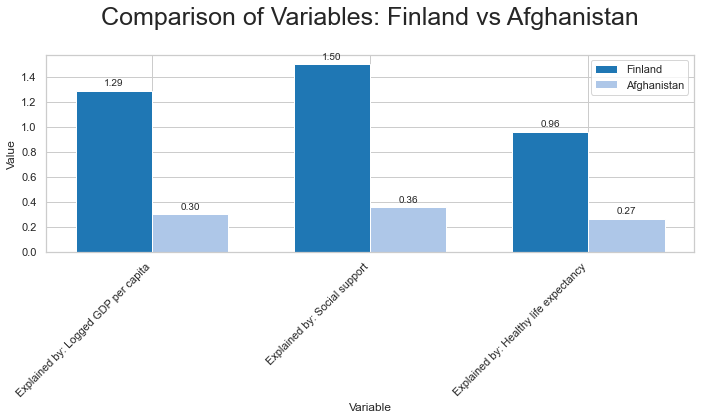

In [951]:
data_finland = {
    'Variable': ['Explained by: Logged GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy'],
    'Finland': [1.28519, 1.499526, 0.961271]
}
data_afghanistan = {
    'Variable': ['Explained by: Logged GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy'],
    'Afghanistan': [0.300706, 0.356434, 0.266052]
}
df_finland = pd.DataFrame(data_finland)
df_afghanistan = pd.DataFrame(data_afghanistan)
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
custom_palette = ['#1f77b4', '#aec7e8']
for bar in bars_finland + bars_afghanistan:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10)
ax.bar(df_finland.index, df_finland['Finland'], width=bar_width, label='Finland', color=custom_palette[0])
ax.bar(df_afghanistan.index + bar_width, df_afghanistan['Afghanistan'], width=bar_width, label='Afghanistan', color=custom_palette[1])
ax.set_xticks(df_finland.index + bar_width / 2)
ax.set_xticklabels(df_finland['Variable'], rotation=45, ha='right')
ax.set_xlabel('Variable')
ax.set_ylabel('Value')
ax.set_title('Comparison of Variables: Finland vs Afghanistan', fontsize=25, pad=30)
ax.legend()
plt.tight_layout()
plt.show()

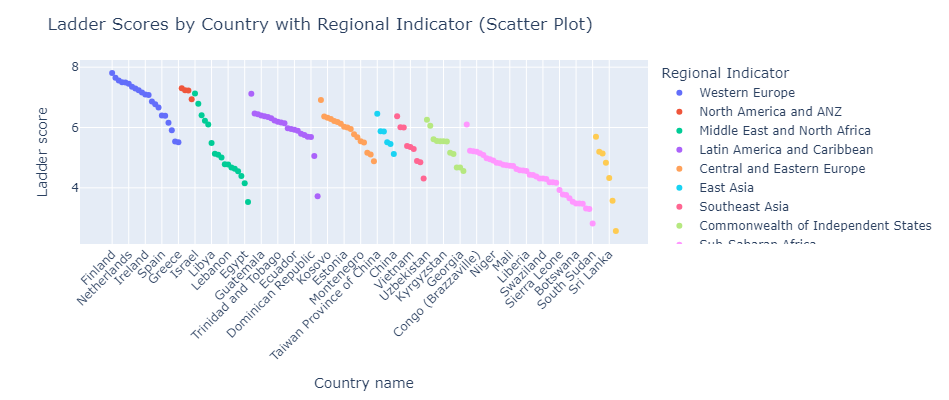

In [952]:
df_sorted = df_cleaned.sort_values(by="Ladder score", ascending=False)
fig = px.scatter(
    df_sorted,
    x='Country name',
    y='Ladder score',
    color='Regional indicator',
    hover_data=['Regional indicator'],  
    color_continuous_scale='Blues',  
)
fig.update_traces(
    hovertemplate='Country: %{x}<br>Ladder score: %{y:.2f}<br>Regional indicator: %{customdata[0]}'
)
fig.update_layout(
    title='Ladder Scores by Country with Regional Indicator (Scatter Plot)',
    xaxis_title='Country name',
    yaxis_title='Ladder score',
    legend_title='Regional Indicator',
    xaxis_tickangle=-45,  
    height=400,  
)
fig.show()

### To enhance the visualization, we will increase the resolution and identify the top 30 happiest countries in the world based on their happiness scores. By doing so, we can gain valuable insights into the countries that rank highest in terms of happiness and well-being.

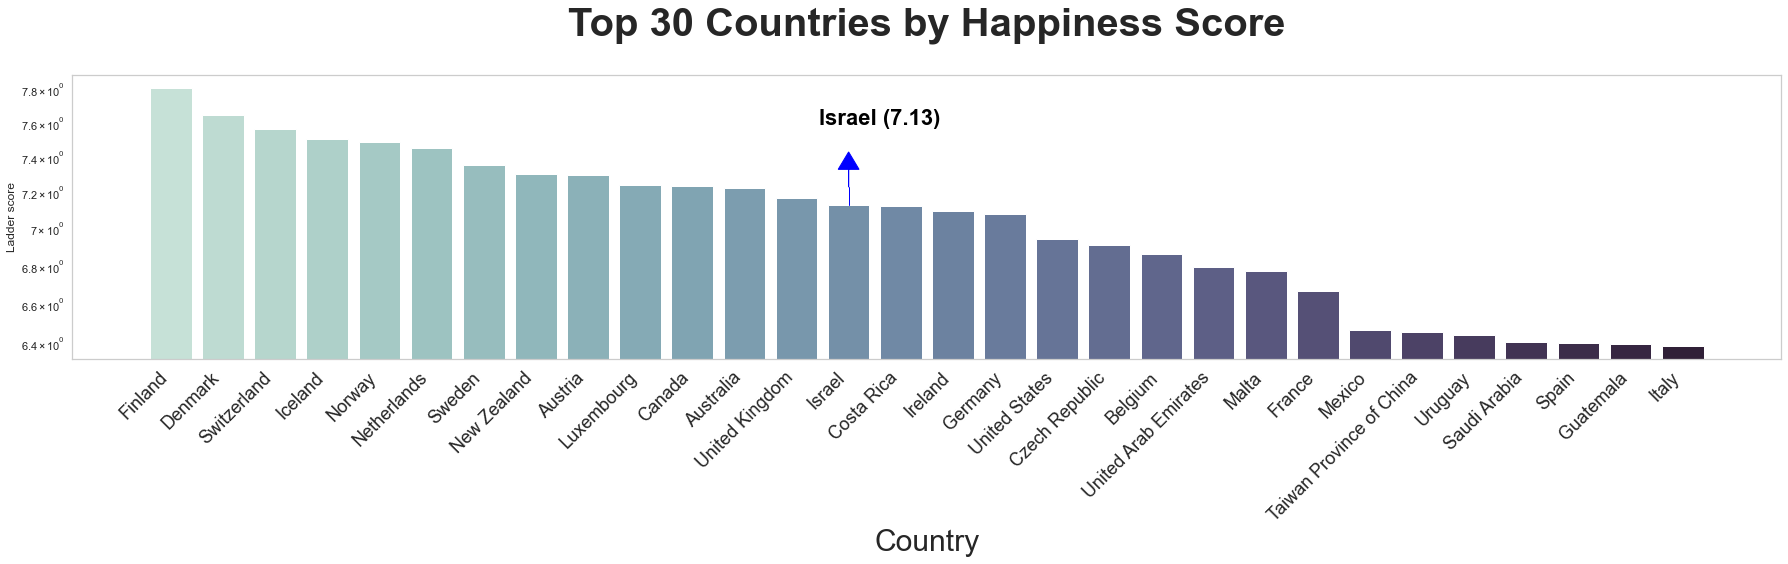

In [938]:
plt.figure(figsize=(25, 8))
custom_colors = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=False, n_colors=30)
sns.barplot(x='Country name', y='Ladder score', data=df_cleaned[:30], palette=custom_colors)
plt.xticks(rotation=45, ha='right', fontsize=18)
arrow_country = 'Israel'
arrow_country_score = df_cleaned[df_cleaned['Country name'] == arrow_country]['Ladder score'].values[0]
arrow_x = df_cleaned.index[df_cleaned['Country name'] == arrow_country][0]
arrow_y = arrow_country_score + 0.1  # Adjust the vertical position of the arrow
arrow_length = 0.1  # Length of the arrow
arrow_head_width = 0.4  # Width of the arrowhead
arrow_angle = 20
plt.plot([arrow_x, arrow_x], [arrow_country_score, arrow_y], color='blue', linestyle='-', linewidth=1)
plt.arrow(arrow_x, arrow_y, 0, arrow_length, head_width=arrow_head_width, head_length=0.1, fc='blue', ec='blue')
plt.annotate(f'{arrow_country} ({arrow_country_score:.2f})', xy=(arrow_x, arrow_country_score),
             xytext=(-30, 80), textcoords='offset points', fontsize=22, fontweight='bold', color='black')
plt.grid(axis='y', linestyle='-', alpha=0.2)
plt.title('Top 30 Countries by Happiness Score', fontsize=40, fontweight='bold', pad=40) 
plt.xlabel('Country', fontsize=30)
plt.yscale('log')
plt.tight_layout()
plt.show()

Despite the challenging security situation compared to other countries, Israel stands out as a remarkable exception. The citizens of Israel report significantly higher levels of happiness and peace, ranking 15th in the world. This observation highlights the resilience and positive outlook of the people in the face of adversity.

In [911]:
df_sorted = df_cleaned.sort_values(by='Ladder score', ascending=False)
data_sorte = (df_sorted[['Country name', 'Ladder score','Regional indicator']]).head(15)
data_sorte

,Country name,Ladder score,Regional indicator
0,Finland,7.8087,Western Europe
1,Denmark,7.6456,Western Europe
2,Switzerland,7.5599,Western Europe
3,Iceland,7.5045,Western Europe
4,Norway,7.4880,Western Europe
5,Netherlands,7.4489,Western Europe
6,Sweden,7.3535,Western Europe
7,New Zealand,7.2996,North America and ANZ
8,Austria,7.2942,Western Europe
9,Luxembourg,7.2375,Western Europe


No handles with labels found to put in legend.


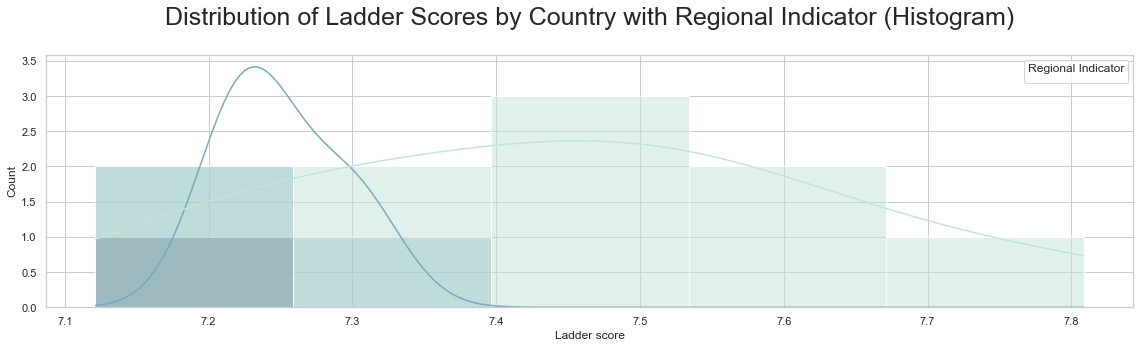

In [770]:
custom_palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=False, n_colors=4)
plt.figure(figsize=(16, 5))  
sns.histplot(data=data_sorte, x='Ladder score', hue='Regional indicator', palette=custom_palette, kde=True)
plt.xlabel("Ladder score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Ladder Scores by Country with Regional Indicator (Histogram)", fontsize=25, pad=30)
plt.legend(title="Regional Indicator", loc="upper right", fontsize=10)  # Add legend for regional indicator
plt.tight_layout()
plt.show()

The histogram shows the distribution of ladder scores (happiness levels) across countries, grouped by regional indicators. It reveals disparities in happiness and highlights variations in happiness levels among different regions. Peaks in the histogram indicate common ladder score ranges, suggesting prevailing happiness levels in certain countries.

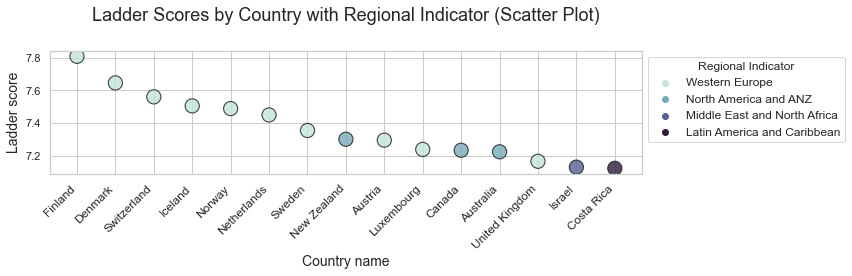

In [935]:
custom_palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=False, n_colors=4)
plt.figure(figsize=(12, 4)) 
sns.scatterplot(x='Country name', y="Ladder score", hue="Regional indicator", data=data_sorte,
                palette=custom_palette, s=200, alpha=0.8, edgecolor='k')
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.xlabel("Country name", fontsize=14)
plt.ylabel("Ladder score", fontsize=14)
plt.title("Ladder Scores by Country with Regional Indicator (Scatter Plot)", fontsize=18, pad=30)
plt.legend(title="Regional Indicator", loc="upper left", bbox_to_anchor=(1, 1), fontsize=12)  # Move legend to upper left
plt.grid(axis='y', linestyle='-', alpha=0.99999)  # Add background grid
plt.tight_layout()
plt.show()

 Here we can see the 15 most happiness country in the world. we can also see that there is another thing the almost common to all this countries that most of them is in west Europe.

#### Now i want to Relate to this countries and to find out what the most peaceful and quiet area in the world

In [592]:
data_Regional = df_cleaned.groupby(["Regional indicator", "Country name"])["Ladder score"].mean().reset_index().sort_values(by="Ladder score", ascending=False)
print(data_Regional)

     Regional indicator              Country name  Ladder score
136      Western Europe                   Finland        7.8087
135      Western Europe                   Denmark        7.6456
151      Western Europe               Switzerland        7.5599
140      Western Europe                   Iceland        7.5045
147      Western Europe                    Norway        7.4880
..                  ...                       ...           ...
98   Sub-Saharan Africa  Central African Republic        3.4759
121  Sub-Saharan Africa                    Rwanda        3.3123
131  Sub-Saharan Africa                  Zimbabwe        3.2992
125  Sub-Saharan Africa               South Sudan        2.8166
77           South Asia               Afghanistan        2.5669

[153 rows x 3 columns]


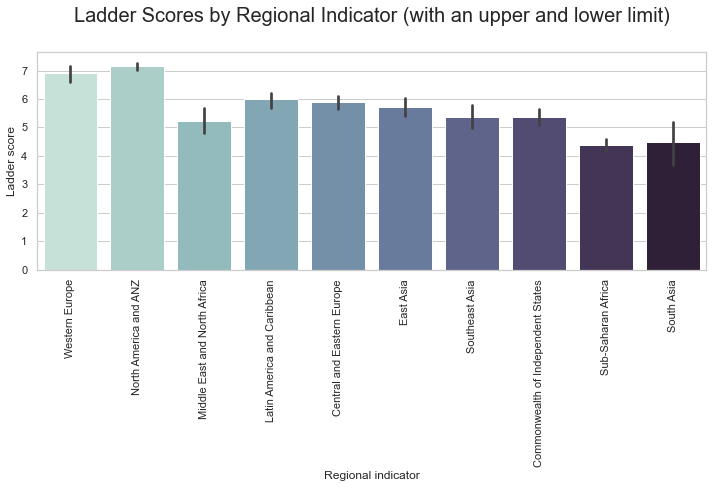

In [962]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(12, 4))
custom_palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=False, n_colors=10)
df_sorted = df_cleaned.sort_values(by="Ladder score", ascending=False)
sns.barplot(x='Regional indicator', y='Ladder score', data=df_sorted, palette=custom_palette)
plt.title("Ladder Scores by Regional Indicator (with an upper and lower limit)", fontsize=20, pad=30)
plt.xticks(rotation=90)
plt.show()


#### We can see that the most peacfull and happines regions in the world are: 
    1)North Americe and ANZ
    2)Western Europe

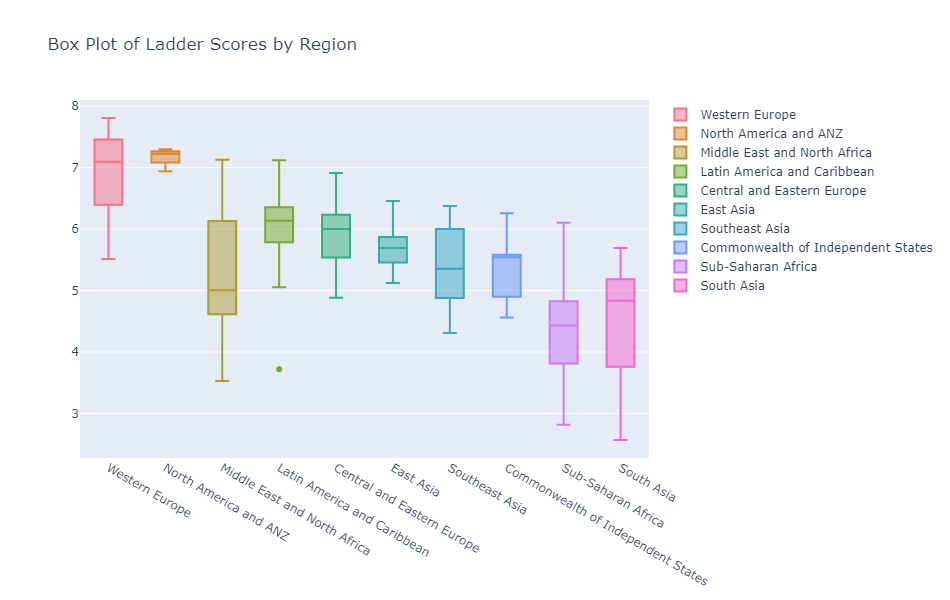

<Figure size 432x288 with 0 Axes>

In [882]:
import seaborn as sns
import plotly.graph_objs as go

sns.set_style("whitegrid")
custom_palette = sns.color_palette("husl", n_colors=10)
fig = go.Figure()

for region, color in zip(df_cleaned['Regional indicator'].unique(), custom_palette):
    data_subset = df_cleaned[df_cleaned['Regional indicator'] == region]
    fig.add_trace(go.Box(x=data_subset['Regional indicator'], y=data_subset['Ladder score'],
                         name=region, marker_color=f"rgb{tuple(int(255*c) for c in color[:3])}"))

fig.update_traces(hovertemplate='Ladder score: %{y:.2f}<br>Regional indicator: %{x}')
fig.update_layout(width=1000, height=600, title='Box Plot of Ladder Scores by Region') 
plt.tight_layout()
fig.show()


### Insights from the graph:
 1) This boxplot reveals the most peaceful and happiest regions while examining the distribution of countries within these areas based on          their happiness rankings, spanning from the lowest to the highest within each region. 
 2) More than that we can see that in North Americe and ANZ all the countries upper than 7 in the ledder score.
 3) We can also see that in Latin America and Caribian there is exceptional country.

In [366]:
country_to_region_df = df_cleaned.loc[:, ["Country name", "Regional indicator","Ladder score"]]
country_to_region_df

,Country name,Regional indicator,Ladder score
0,Finland,Western Europe,7.8087
1,Denmark,Western Europe,7.6456
2,Switzerland,Western Europe,7.5599
3,Iceland,Western Europe,7.5045
4,Norway,Western Europe,7.4880
...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759
149,Rwanda,Sub-Saharan Africa,3.3123
150,Zimbabwe,Sub-Saharan Africa,3.2992
151,South Sudan,Sub-Saharan Africa,2.8166


### I have included a map plot to help you assess whether the country you live in is a happy and peaceful place, based on the distribution of ladder scores across countries with their respective regional indicators.

C:\Users\Rotem\AppData\Local\Temp/ipykernel_62752/2669195597.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

C:\Users\Rotem\AppData\Local\Temp/ipykernel_62752/2669195597.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




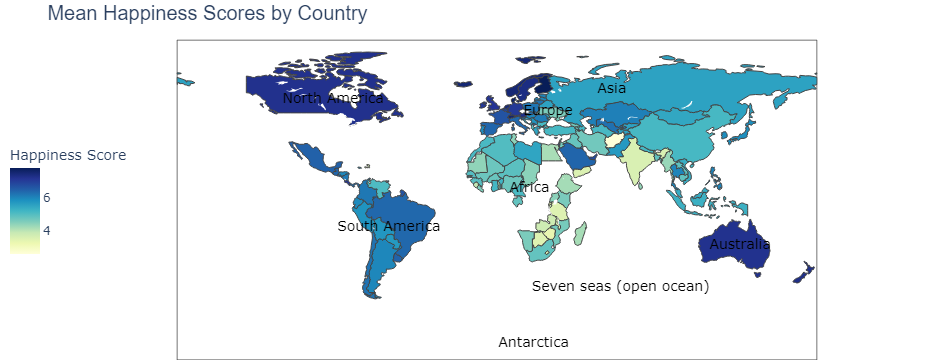

In [963]:
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_map = world_map.merge(country_to_region_df, left_on='name', right_on='Country name')
fig = px.choropleth(merged_map,
                    geojson=merged_map.geometry,
                    locations=merged_map.index,
                    color='Ladder score',
                    color_continuous_scale='YlGnBu',
                    hover_name='name',
                    hover_data={'Ladder score': True, 'Regional indicator': True},
                    projection='natural earth'
                    )
continent_centroids = world_map.dissolve(by='continent').centroid
continent_names_df = pd.DataFrame({
    'name': continent_centroids.index,
    'lat': continent_centroids.y,
    'lon': continent_centroids.x
})
europe_lat = continent_names_df.loc[continent_names_df['name'] == 'Europe', 'lat'].values[0]
europe_lon = continent_names_df.loc[continent_names_df['name'] == 'Europe', 'lon'].values[0]
europe_lat += -10  # Move Europe further up
europe_lon -= 50  # Move Europe to the left
asia_lat = continent_names_df.loc[continent_names_df['name'] == 'Asia', 'lat'].values[0]
asia_lon = continent_names_df.loc[continent_names_df['name'] == 'Asia', 'lon'].values[0]
asia_lat += 30  # Move Asia further up
asia_lon -= 20  # Move Asia to the left
continent_names_df.loc[continent_names_df['name'] == 'Europe', 'lat'] = europe_lat
continent_names_df.loc[continent_names_df['name'] == 'Europe', 'lon'] = europe_lon
continent_names_df.loc[continent_names_df['name'] == 'Asia', 'lat'] = asia_lat
continent_names_df.loc[continent_names_df['name'] == 'Asia', 'lon'] = asia_lon
continent_names_df.loc[continent_names_df['name'] == 'Oceania', 'name'] = 'Australia'
fig.add_scattergeo(
    lat=continent_names_df['lat'],
    lon=continent_names_df['lon'],
    text=continent_names_df['name'],
    mode='text',
    textfont=dict(size=14, color='black'),
    showlegend=False
)
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.update_layout(title='Mean Happiness Scores by Country',
                  title_font_size=20,
                  title_font_family='Arial',
                  geo=dict(showframe=True, showcoastlines=False, projection_type='equirectangular'),
                  margin=dict(l=0, r=0, t=40, b=0),
                  coloraxis_colorbar=dict(title='Happiness Score', xanchor='left', x=-0.05, len=0.4)
                  )
fig.show()

------
<a id='section4'></a>
### Research Question 2: Factors Influencing Happiness Scores

###### now after i find the most peacfull region in the world i want to take a look closer and I want to check what is the most significant factor in happiness

In [200]:
data_region_mean = df_cleaned.groupby(["Regional indicator"]).mean()
data_region_mean

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Regional indicator,,,,,,,,,,,,,,,,,,
Central and Eastern Europe,5.883818,0.043896,5.969854,5.797781,9.975703,0.874566,68.148988,0.770271,-0.102712,0.850859,1.972317,1.079527,1.311129,0.826199,0.447895,0.131079,0.054702,2.033282
Commonwealth of Independent States,5.358342,0.042306,5.441262,5.275421,9.207234,0.856729,64.726558,0.784004,-0.041285,0.746387,1.972317,0.841350,1.268998,0.702987,0.464354,0.171706,0.122152,1.786795
East Asia,5.714850,0.039475,5.792221,5.637479,10.316895,0.859852,71.094847,0.761027,-0.051978,0.702266,1.972317,1.185275,1.276376,0.932255,0.436815,0.164634,0.150638,1.568866
Latin America and Caribbean,5.981786,0.063247,6.105750,5.857821,9.303024,0.856891,66.717328,0.830684,-0.071901,0.801526,1.972317,0.871039,1.269381,0.774657,0.520302,0.151457,0.086553,2.308386
Middle East and North Africa,5.227159,0.053364,5.331752,5.122566,9.713648,0.796720,65.313611,0.710171,-0.084426,0.761510,1.972317,0.998307,1.127260,0.724121,0.375862,0.143173,0.112388,1.746049
North America and ANZ,7.173525,0.042257,7.256349,7.090701,10.709919,0.933842,72.177067,0.907045,0.164180,0.431717,1.972317,1.307087,1.451136,0.971216,0.611826,0.307593,0.325313,2.199327
South Asia,4.475443,0.047160,4.567876,4.383010,8.559491,0.708996,62.448662,0.771805,0.035106,0.790656,1.972317,0.640591,0.920061,0.620979,0.449734,0.222228,0.093571,1.528265
Southeast Asia,5.383367,0.044137,5.469875,5.296858,9.366847,0.824093,64.710476,0.912667,0.161870,0.704920,1.972317,0.890821,1.191915,0.702408,0.618563,0.306065,0.148924,1.524672
Sub-Saharan Africa,4.383495,0.070042,4.520777,4.246212,7.904056,0.681972,55.091591,0.719702,0.002383,0.770404,1.972317,0.437448,0.856232,0.356113,0.387285,0.200586,0.106646,2.039189


#### Focusing on the happiest region: North America and ANZ:

In [217]:
data_north_america = data_region_mean.loc[["North America and ANZ"],["Explained by: Log GDP per capita","Explained by: Social support","Explained by: Healthy life expectancy","Explained by: Freedom to make life choices","Explained by: Generosity","Explained by: Perceptions of corruption"]] 
data_north_america

,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
Regional indicator,,,,,,
North America and ANZ,1.307087,1.451136,0.971216,0.611826,0.307593,0.325313


#### Focusing on the saddest region: Sub-Saharan Africa:

In [599]:
data_sub_saharan = data_region_mean.loc[["Sub-Saharan Africa"],["Explained by: Log GDP per capita","Explained by: Social support","Explained by: Healthy life expectancy","Explained by: Freedom to make life choices","Explained by: Generosity","Explained by: Perceptions of corruption"]] 
data_sub_saharan

,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
Regional indicator,,,,,,
Sub-Saharan Africa,0.437448,0.856232,0.356113,0.387285,0.200586,0.106646


#### Now i want to find out what are the main reasones to happines:

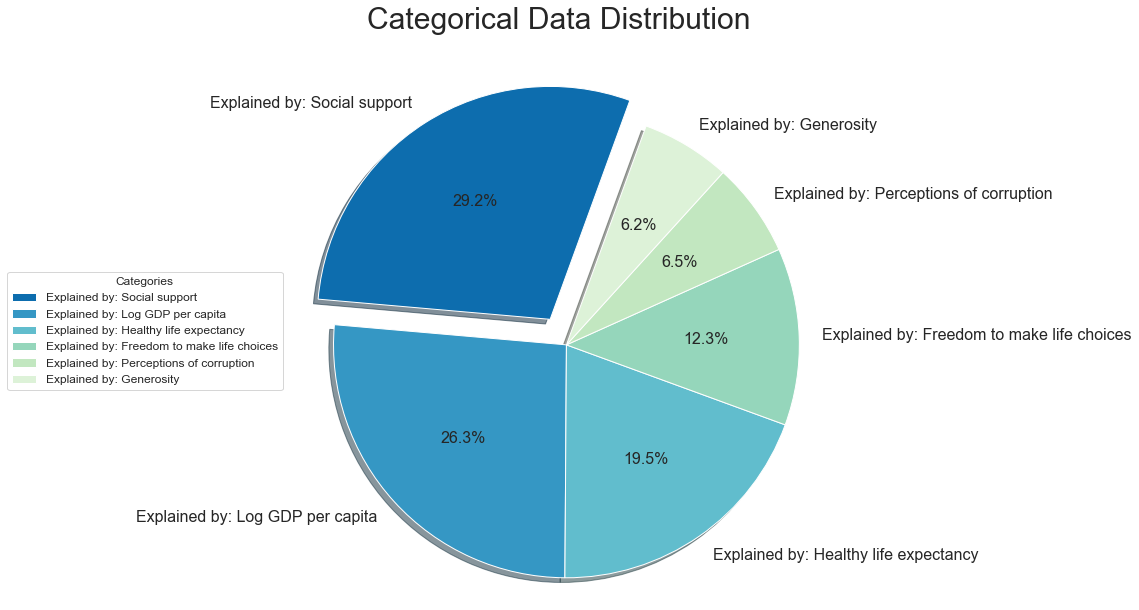

In [764]:
import matplotlib.pyplot as plt
import seaborn as sns
categories = ["Explained by: Social support", "Explained by: Log GDP per capita", "Explained by: Healthy life expectancy",
              "Explained by: Freedom to make life choices", "Explained by: Perceptions of corruption", "Explained by: Generosity"]
counts = [1.451136, 1.307087, 0.971216, 0.611826, 0.325313, 0.307593]
colors = sns.color_palette("GnBu", len(categories))[::-1]
max_index = counts.index(max(counts))
explode = [0.13 if i == max_index else 0 for i in range(len(categories))]
plt.figure(figsize=(10, 10))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=70, colors=colors, explode=explode,
        shadow=True, textprops={'fontsize': 16})  # Add shadow and customize label font size
plt.axis('equal') 
plt.legend(categories, title="Categories", loc="center left", bbox_to_anchor=(-0.5, 0.5), fontsize=12)  # Adjust legend position and font size
plt.title('Categorical Data Distribution', fontsize=30, pad=30)
plt.show()

### Here we can see that the 3 main reasons for happines are:
1) Social support
2) Log GDP per capita
3) healthy life expectancy

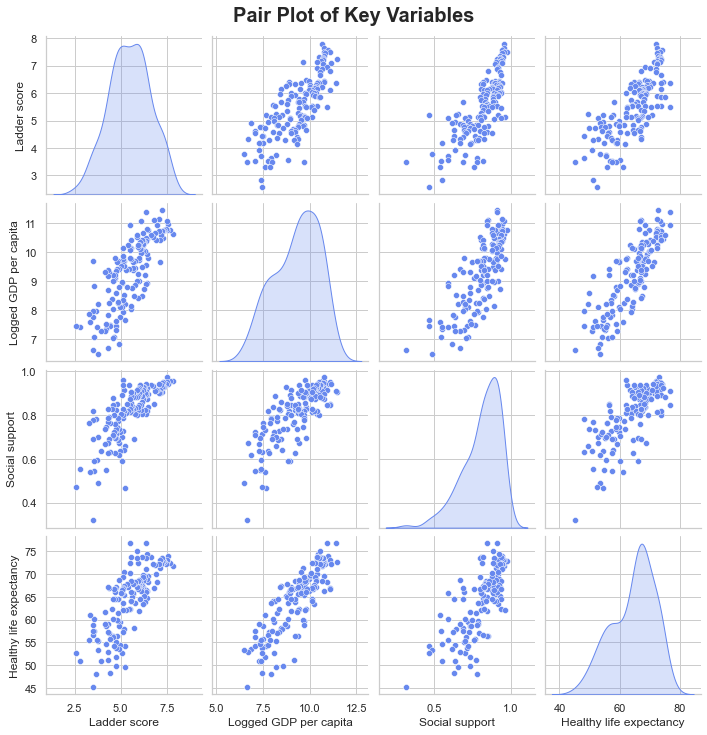

In [792]:
sns.set_palette("coolwarm", 6)
sns.pairplot(df_cleaned[['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy']],
             diag_kind='kde', markers='o')
plt.suptitle('Pair Plot of Key Variables', fontsize=20, fontweight='bold', y=1.02)
plt.show()

---
<a id='section5'></a>
### Research Question 3: 
Checking the correlation between the reasons for happiness and the ledder score:

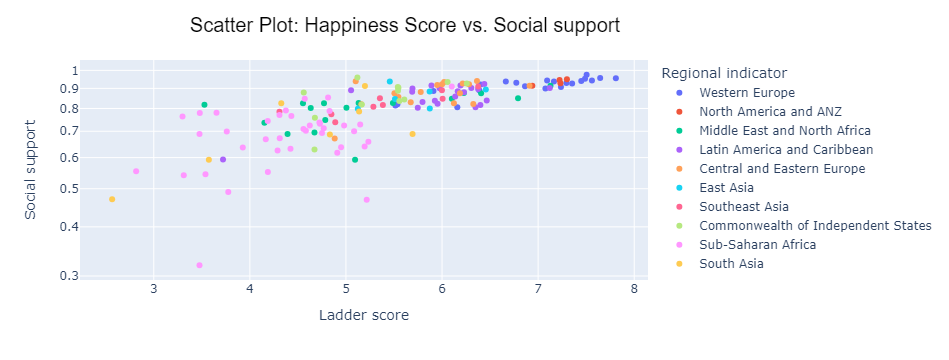

In [808]:
fig = px.scatter(df_cleaned, x='Ladder score', y='Social support', color='Regional indicator',
                 hover_name='Regional indicator', hover_data=['Ladder score', 'Healthy life expectancy'])
fig.update_layout(title='Scatter Plot: Happiness Score vs. Social support',
                  title_font=dict(size=20, family="Arial", color="black"),
                  title_x=0.2,  # Center the title
                  title_y=0.95,  # Adjust the vertical position of the title
                  )
fig.update_yaxes(type='log')
fig.show()

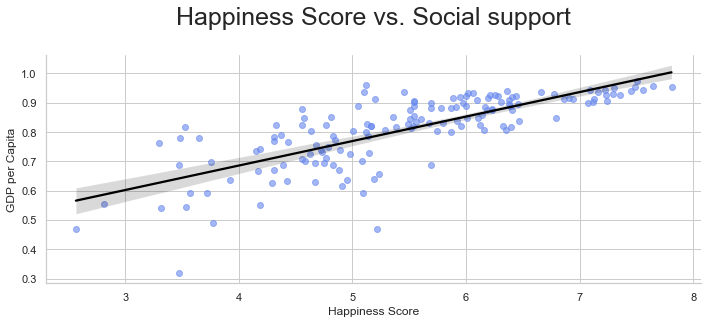

In [824]:
sns.lmplot(x='Ladder score', y='Social support', data=df_cleaned, scatter_kws={'alpha':0.6}, line_kws={'color':'black'},
           height=4, aspect=2.5)
plt.title('Happiness Score vs. Social support', fontsize=25, pad=30)
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')
plt.show()

We can see that Social Support have a very good coralation to the ledder score. 

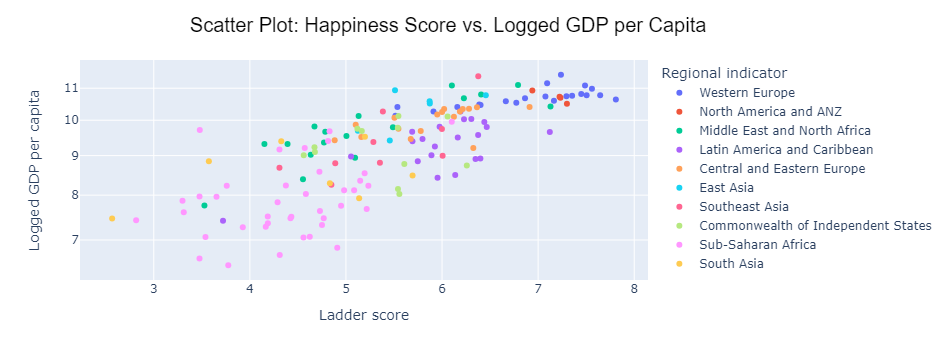

In [826]:
fig = px.scatter(df_cleaned, x='Ladder score', y='Logged GDP per capita', color='Regional indicator',
                 hover_name='Regional indicator', hover_data=['Ladder score', 'Healthy life expectancy'])
fig.update_layout(title='Scatter Plot: Happiness Score vs. Logged GDP per Capita',
                  title_font=dict(size=20, family="Arial", color="black"),
                  title_x=0.2,  # Center the title
                  title_y=0.95,  # Adjust the vertical position of the title
                  )
fig.update_yaxes(type='log')
fig.show()

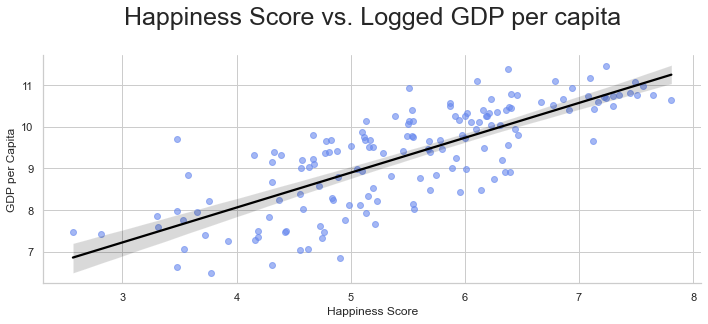

In [823]:
sns.lmplot(x='Ladder score', y='Logged GDP per capita', data=df_cleaned, scatter_kws={'alpha':0.6}, line_kws={'color':'black'},
           height=4, aspect=2.5)
plt.title('Happiness Score vs. Logged GDP per capita', fontsize=25, pad=30)
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')
plt.show()

Here We can also see that GDP have a very good coralation to the ledder score. 

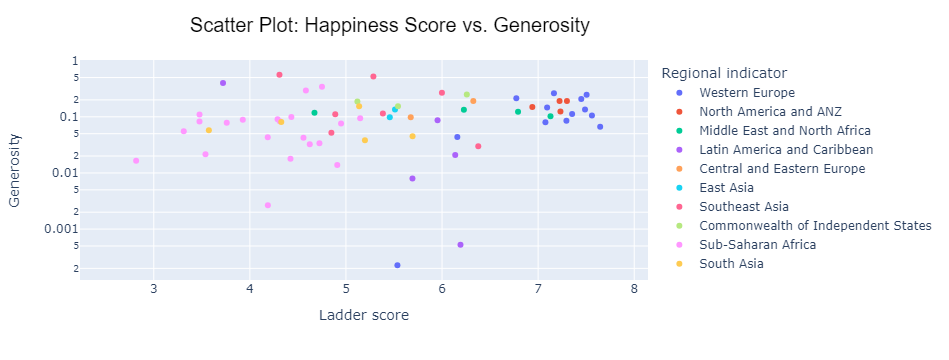

In [ ]:
fig = px.scatter(df_cleaned, x='Ladder score', y='Generosity', color='Regional indicator',
                 hover_name='Regional indicator', hover_data=['Ladder score', 'Healthy life expectancy'])
fig.update_layout(title='Scatter Plot: Happiness Score vs. Generosity',
                  title_font=dict(size=20, family="Arial", color="black"),
                  title_x=0.2,  # Center the title
                  title_y=0.95,  # Adjust the vertical position of the title
                  )
fig.update_yaxes(type='log')
fig.show()

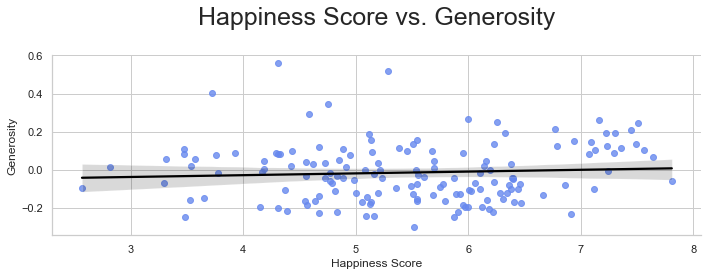

In [822]:
sns.lmplot(x='Ladder score', y='Generosity', data=df_cleaned, scatter_kws={'alpha': 0.8}, line_kws={'color': 'black'},
           height=4, aspect=2.5)
plt.title('Happiness Score vs. Generosity', fontsize=25, pad=30)
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')
plt.tight_layout()
plt.show()

On the other hand, here you can see that the generosity of the population in the country
Has almost no effect on the happiness scale, so its correlation is low.



## Methodology

#### Data Collection

I collected data from reputable sources.

#### Data Analysis

I used Python and various data analysis libraries to process and analyze the data. Exploratory data analysis (EDA) and visualizations were employed to gain insights.

## Findings

My findings reveal intriguing patterns and disparities in happiness scores across nations. Some key observations include:

- The 3 main indicator to check happines are: Social support, GDP and Healthy life expectancy.
- Freedom to make life choices has a significant impact on well-being.
- The most happier country in the world is: Finland.
- The most happier region in the world is: North America and ANZ.
- Israel located in a good place at the scale: 15th

## Conclusion

Through this project, I have gained valuable insights into the complex dynamics of global happiness. My findings can serve as a basis for policymakers and researchers to foster well-being and happiness on a global scale.

Join me on this journey to explore the fascinating world of happiness disparities among nations.


![Happiness Image](https://www.brainyquote.com/photos_tr/en/d/dalailama/132971/dalailama1-2x.jpg)